# `find_trapped_regions`
This is meant to find regions of defending phase that are trapped during an invasion simulation. It works for both ordinary and invasion percolation type simulations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import porespy as ps
import inspect
ps.visualization.set_mpl_style()
inspect.signature(ps.filters.find_trapped_regions)

<Signature (seq, outlets=None, bins=25, return_mask=True)>

  0%|          | 0/25 [00:00<?, ?it/s]

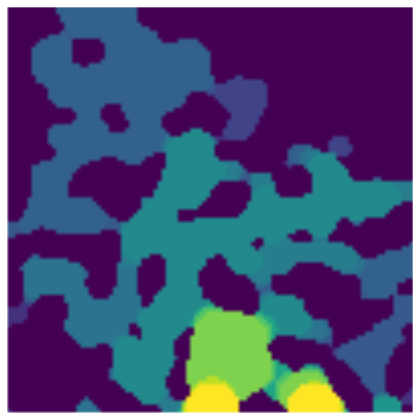

In [2]:
np.random.seed(7)
im = ps.generators.blobs(shape=[100, 100], porosity=0.6)
inlets = np.zeros_like(im)
inlets[0, :] = True
outlets = np.zeros_like(im)
outlets[-1, :] = True
sizes = ps.filters.porosimetry(im, inlets=inlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(sizes, interpolation='none', origin='lower')
ax.axis(False);

## `seq`
Given the sequence at which each voxel was invaded, this finds all voxels that were invaded after they were cutoff from the outlet.  The output of ``porosimetry`` however is in the reverse order, since the largest sizes are invaded first.  PoreSpy has a function for this, called ``size_to_seq``:

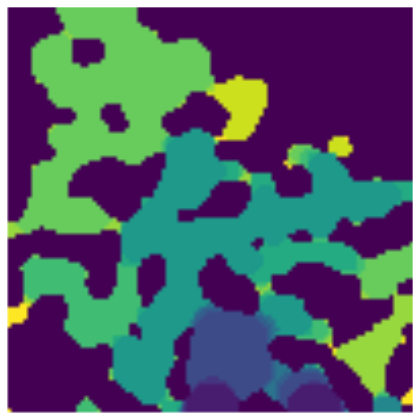

In [3]:
seq = ps.filters.size_to_seq(sizes)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(seq, interpolation='none', origin='lower')
ax.axis(False);

Now we can pass this result into ``find_trapped_regions``:

  0%|          | 0/25 [00:00<?, ?it/s]

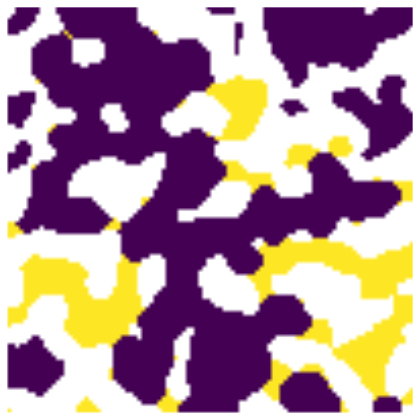

In [4]:
trapped = ps.filters.find_trapped_regions(seq=seq, outlets=outlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(trapped/im, interpolation='none', origin='lower')
ax.axis(False);

In the above image the trapped regions are indicated by ``True``, so this can be used as a mask to remove invading voxels from the invasion image.

## `outlets`
It's possible to specify the which voxels are treated as the outlets.  If the outlets were on the right we'd see the following:

  0%|          | 0/25 [00:00<?, ?it/s]

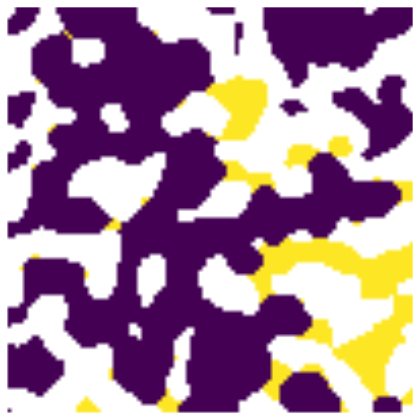

In [5]:
outlets = np.zeros_like(im)
outlets[:, 0] = True
trapped = ps.filters.find_trapped_regions(seq=seq, outlets=outlets)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(trapped/im, interpolation='none', origin='lower')
ax.axis(False);

## `bins`
The function works by iterating backwards through the invasion sequence.  If a lot of small steps were taken, such as occurs in the invasion percolation function (`ibip`) this can be unreasonably slow.  It's possible to specify the number of steps analyzed, or even which steps to use via the `bins` argument.  The default is 25.  Specifying `None` results in all bins being used.  Passing a list of bins sizes is used directly.

  0%|          | 0/2 [00:00<?, ?it/s]

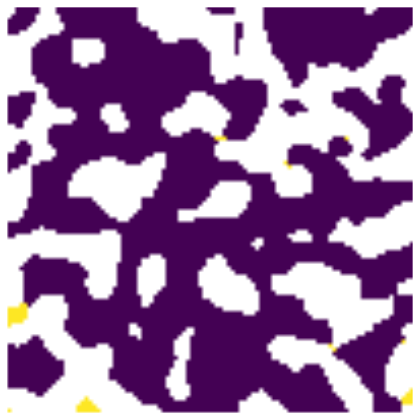

In [6]:
outlets = np.zeros_like(im)
outlets[-1, :] = True
trapped = ps.filters.find_trapped_regions(seq=seq, outlets=outlets, bins=2)
fig, ax = plt.subplots(1, 1, figsize=[6, 6])
ax.imshow(trapped/im, interpolation='none', origin='lower')
ax.axis(False);